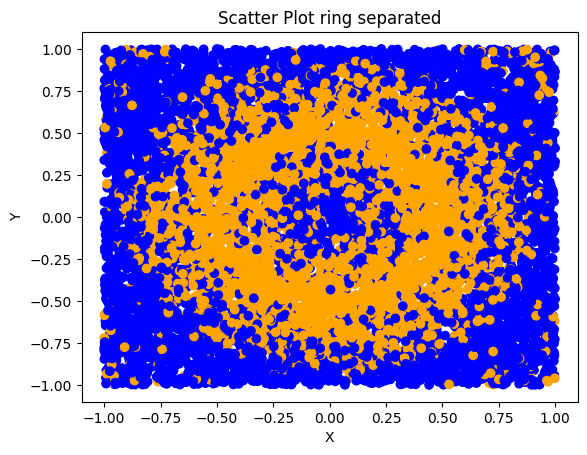

In [11]:
###··· RING MERGED DATASET ···### 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

# Part 1: Selecting and analyzing the dataset 
# #Load the dataset
ring_merged = pd.read_csv("A2-ring\A2-ring-merged.txt", sep='\t', header=None)
ring_merged.columns = ["X", "Y", "Result"]
# Select the first two columns
x_t_merged = ring_merged[["X", "Y"]]
y_t_merged = ring_merged[["Result"]]

ring_test = pd.read_csv("A2-ring\A2-ring-test.txt", sep='\t', header=None)
ring_test.columns = ["X", "Y", "Result"]
x_v = ring_test[["X", "Y"]]
y_v = ring_test[["Result"]]

# Scale the dat
scaler = MinMaxScaler()
x_t_merged_scaled = scaler.fit_transform(x_t_merged)
x_v_scaled = scaler.fit_transform(x_v)

plt.scatter(x_t_merged["X"], x_t_merged["Y"], c=y_t_merged["Result"].map({0: 'blue', 1: 'orange'}), marker="o")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot ring separated")
plt.show()

Epoch 1/50
250/250 - 2s - loss: 0.6869 - accuracy: 0.5316 - val_loss: 0.6828 - val_accuracy: 0.5415 - 2s/epoch - 6ms/step
Epoch 2/50
250/250 - 1s - loss: 0.6388 - accuracy: 0.6323 - val_loss: 0.5896 - val_accuracy: 0.7325 - 526ms/epoch - 2ms/step
Epoch 3/50
250/250 - 1s - loss: 0.5694 - accuracy: 0.7246 - val_loss: 0.5459 - val_accuracy: 0.7520 - 515ms/epoch - 2ms/step
Epoch 4/50
250/250 - 1s - loss: 0.5505 - accuracy: 0.7437 - val_loss: 0.5671 - val_accuracy: 0.7000 - 513ms/epoch - 2ms/step
Epoch 5/50
250/250 - 1s - loss: 0.5463 - accuracy: 0.7416 - val_loss: 0.5342 - val_accuracy: 0.7760 - 525ms/epoch - 2ms/step
Epoch 6/50
250/250 - 0s - loss: 0.5407 - accuracy: 0.7510 - val_loss: 0.5271 - val_accuracy: 0.7675 - 491ms/epoch - 2ms/step
Epoch 7/50
250/250 - 1s - loss: 0.5351 - accuracy: 0.7581 - val_loss: 0.5289 - val_accuracy: 0.7730 - 545ms/epoch - 2ms/step
Epoch 8/50
250/250 - 0s - loss: 0.5330 - accuracy: 0.7584 - val_loss: 0.5164 - val_accuracy: 0.7740 - 466ms/epoch - 2ms/step
Epo

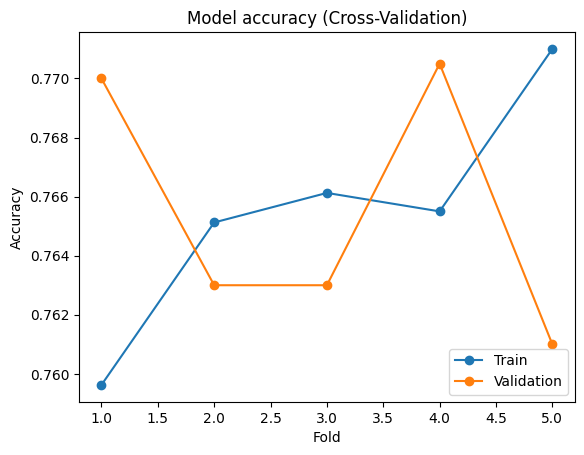

In [12]:
# Part 2: Implementation of NN
from tensorflow import keras as keras
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# Define the number of folds for cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits)

# Initialize lists to store the training and validation accuracies for each fold
train_accuracies = []
val_accuracies = []

# Perform cross-validation
for train_index, val_index in kf.split(x_t_merged_scaled):
    # Split the data into training and validation sets
    x_train, x_val = x_t_merged_scaled[train_index], x_t_merged_scaled[val_index]
    y_train, y_val = y_t_merged.iloc[train_index], y_t_merged.iloc[val_index]

    # Create the model
    model = keras.models.Sequential([
        keras.layers.Dense(10, input_shape=(x_train.shape[1],), activation='tanh'),
        keras.layers.Dense(5, activation='tanh'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=0.01, ema_momentum=0.05)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    # Train the model
    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=2)

    # Store the training and validation accuracies for this fold
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

# Plot the training and validation accuracies for each fold
plt.plot(range(1, n_splits + 1), train_accuracies, marker='o', label='Train')
plt.plot(range(1, n_splits + 1), val_accuracies, marker='o', label='Validation')
plt.title('Model accuracy (Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.legend()
plt.show()

---Train---
Accuracy Score:  0.7682
---Test---
Accuracy Score:  0.9328
[[4779  554]
 [ 118 4549]]


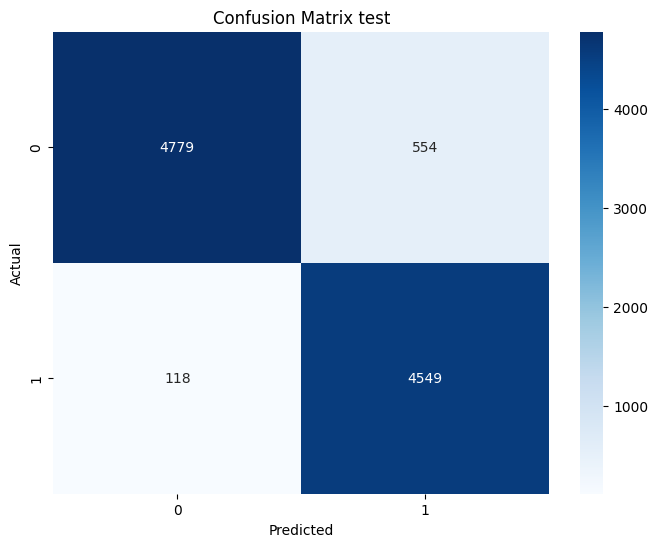

In [14]:
from sklearn.metrics import *
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
import numpy as np

# Part 3: Obtaining predictions
y_pred_train = (model.predict(x_t_merged_scaled, verbose=0)[:, 0] > 0.5).astype(np.int8)
y_pred_test = (model.predict(x_v_scaled, verbose=0)[:, 0] > 0.5).astype(np.int8)
print("---Train---")
print("Accuracy Score: ", accuracy_score(y_t_merged, y_pred_train))
print("---Test---")
print("Accuracy Score: ", accuracy_score(y_v, y_pred_test))

# Generate the confusion matrix

confusion = confusion_matrix(y_v, y_pred_test, labels=[0, 1])
print(confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix test')
plt.show()


